In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

In [2]:
from shapely.geometry import box
import earthpy as et
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)


In [4]:
sns.set(font_scale=1.5)
sns.set_style("white")


data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [5]:
country_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                        "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)


print("country_boundary_us", country_boundary_us.crs)
print("state_boundary_us", state_boundary_us.crs)
print("pop_places", pop_places.crs)

country_boundary_us EPSG:4326
state_boundary_us EPSG:4326
pop_places EPSG:4326


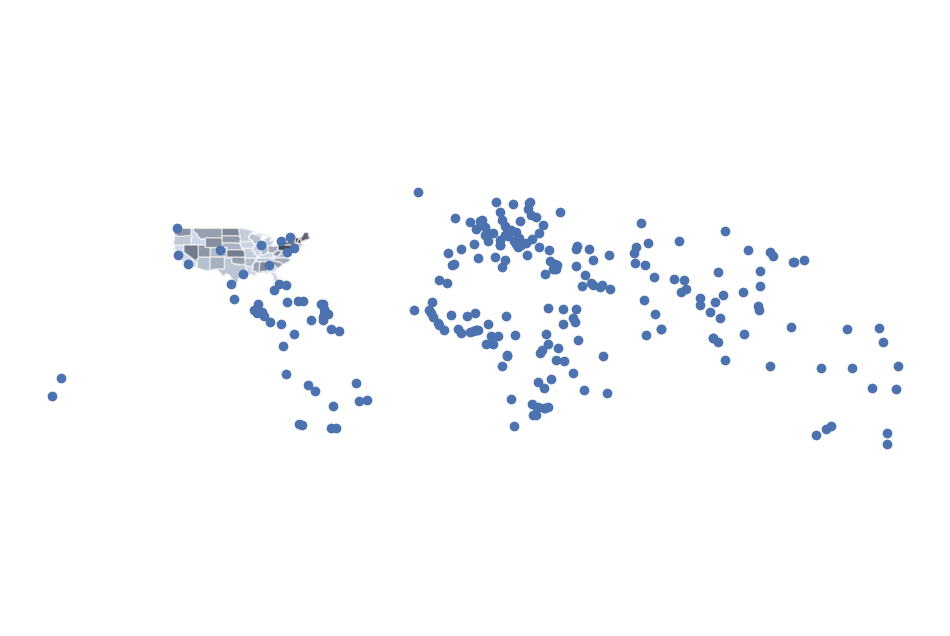

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=.5,
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)
pop_places.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [7]:
points_clip = gpd.clip(pop_places, country_boundary_us)

points_clip[['name', 'geometry', 'scalerank', 'natscale', ]].head()

,name,geometry,scalerank,natscale
178,Miami,POINT (-80.22605 25.78956),1,300
177,Houston,POINT (-95.34193 29.82192),1,300
179,Atlanta,POINT (-84.40190 33.83196),1,300
216,Los Angeles,POINT (-118.18193 33.99192),0,600
175,San Francisco,POINT (-122.41717 37.76920),1,300


TypeError: Axes.annotate() missing 1 required positional argument: 'text'

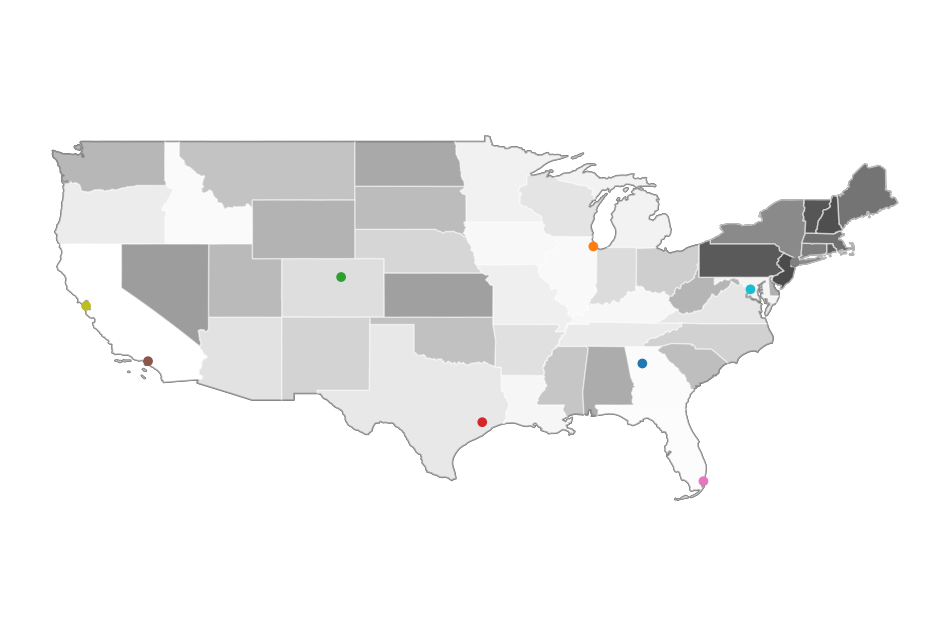

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

points_clip.plot(ax=ax,
                 column='name')
ax.set_axis_off()
plt.axis('equal')

# Label each point - note this is just shown here optionally but is not required for your homework
points_clip.apply(lambda x: ax.annotate(s=x['name'],
                                        xy=x.geometry.coords[0],
                                        xytext=(6, 6), textcoords="offset points",
                                        backgroundcolor="white"),
                  axis=1)
plt.show()

In [9]:
ne_roads_path = os.path.join("data", "spatial-vector-lidar", "global", 
                             "ne_10m_roads", "ne_10m_roads.shp")
ne_roads = gpd.read_file(ne_roads_path)

# Are both layers in the same CRS?
if (ne_roads.crs == country_boundary_us.crs):
    print("Both layers are in the same crs!",
          ne_roads.crs, country_boundary_us.crs)

Both layers are in the same crs! EPSG:4326 EPSG:4326


In [11]:
country_boundary_us_sim = country_boundary_us.simplify(
    .2, preserve_topology=True)

In [12]:
ne_roads_clip = gpd.clip(ne_roads, country_boundary_us_sim)


ne_roads_clip = ne_roads_clip[~ne_roads_clip.is_empty]

print("The clipped data have fewer line objects (represented by rows):",
      ne_roads_clip.shape, ne_roads.shape)

The clipped data have fewer line objects (represented by rows): (7346, 32) (56601, 32)


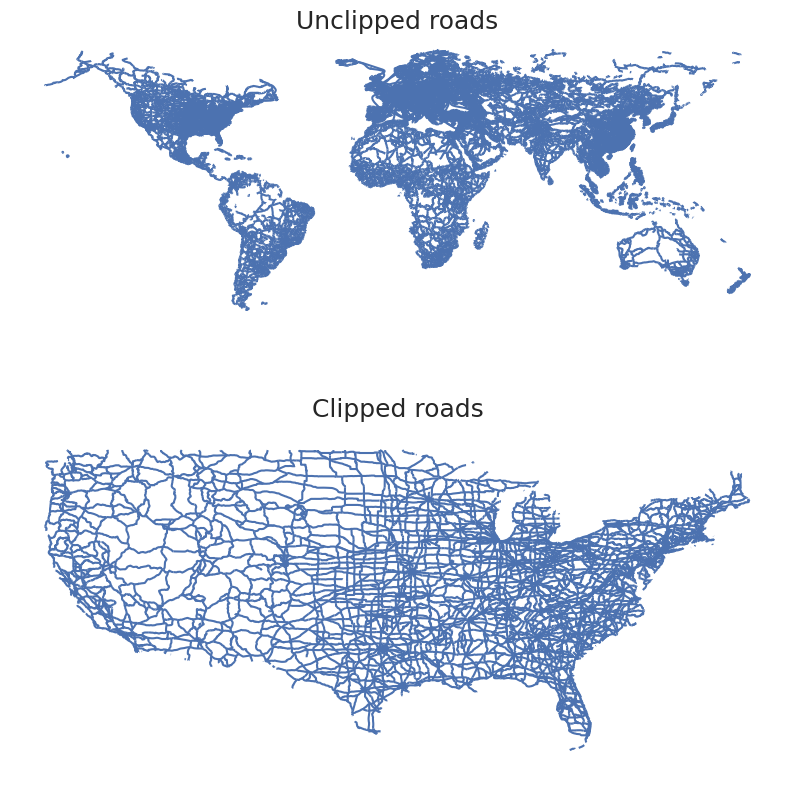

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ne_roads.plot(ax=ax1)
ne_roads_clip.plot(ax=ax2)

ax1.set_title("Unclipped roads")
ax2.set_title("Clipped roads")

ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

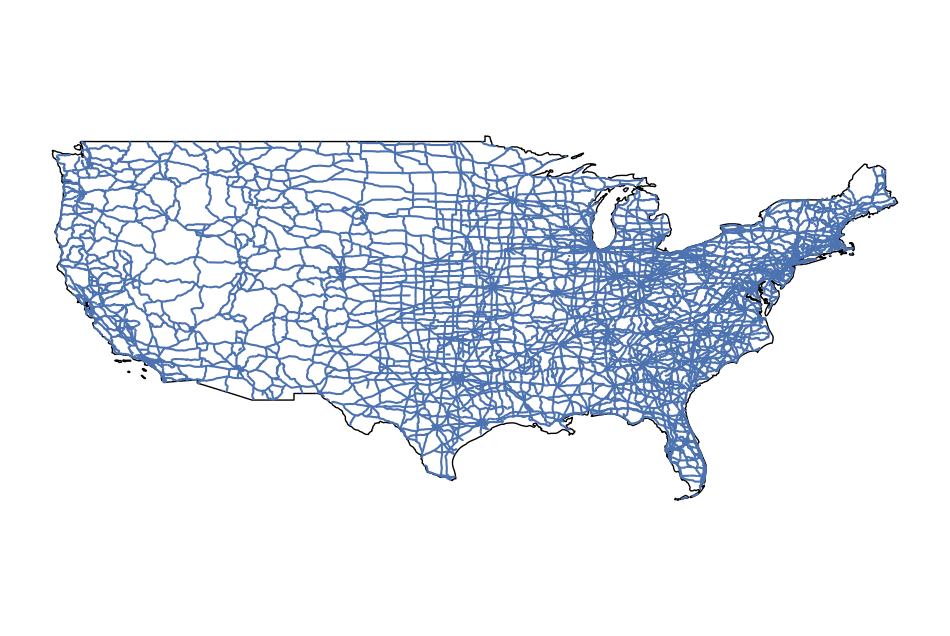

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

ne_roads_clip.plot(ax=ax)

ax.set_axis_off()
plt.axis('equal')
plt.show()

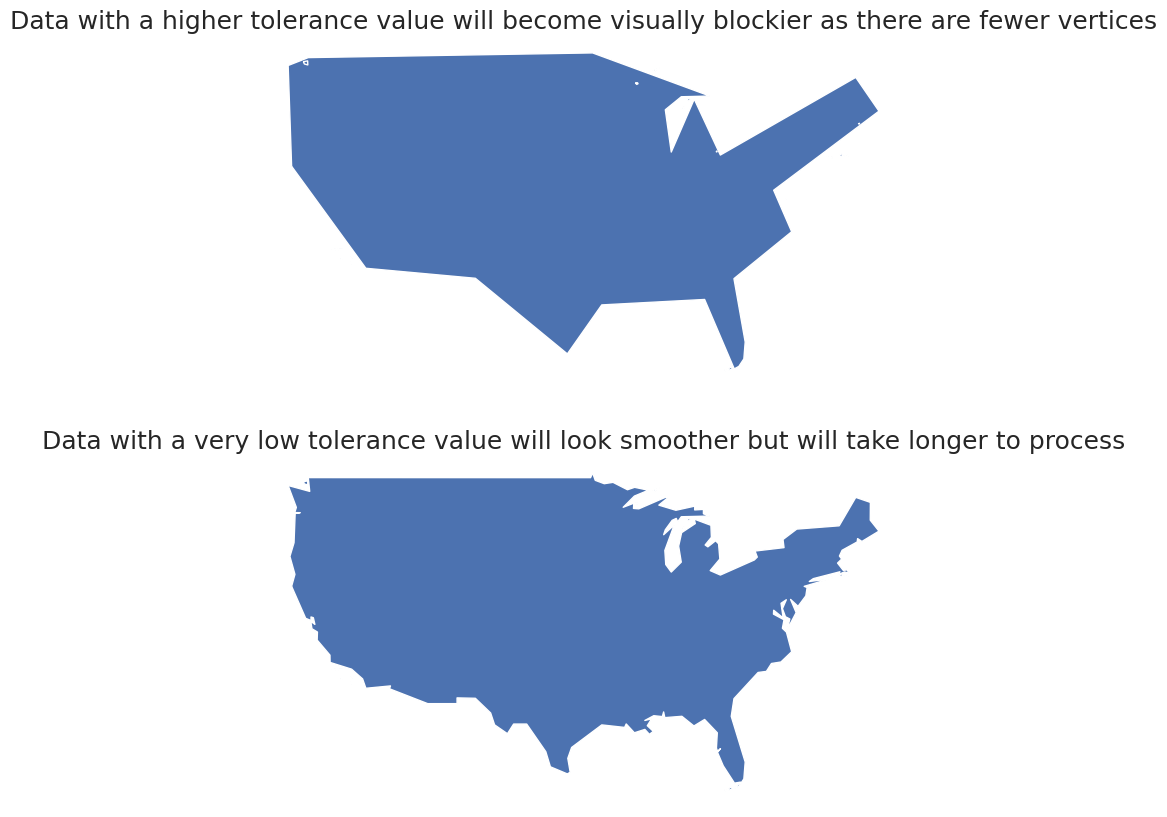

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))


country_boundary_us.simplify(2, preserve_topology=True).plot(ax=ax1)


country_boundary_us.simplify(.2, preserve_topology=True).plot(ax=ax2)

ax1.set_title(
    "Data with a higher tolerance value will become visually blockier as there are fewer vertices")
ax2.set_title(
    "Data with a very low tolerance value will look smoother but will take longer to process")

ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

In [21]:
for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              linewidth=road_attrs[ctype][1],
              ax=ax)

<Figure size 640x480 with 0 Axes>

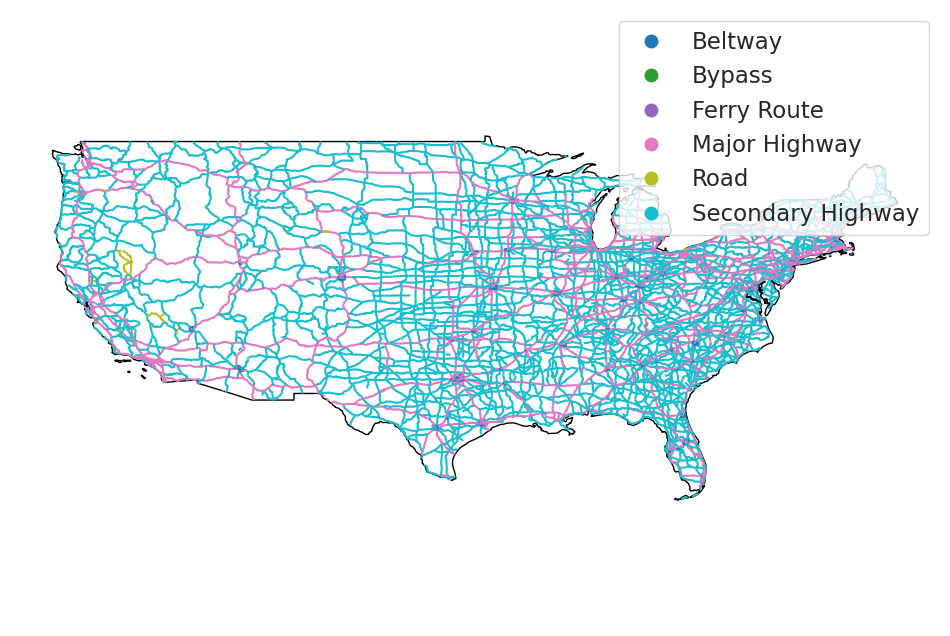

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1, 
                         color="white", 
                         edgecolor="black", 
                         ax=ax)

ne_roads_clip.plot(ax=ax, 
                   column='type', 
                   legend=True)
ax.set_axis_off()
plt.axis('equal')
plt.show()

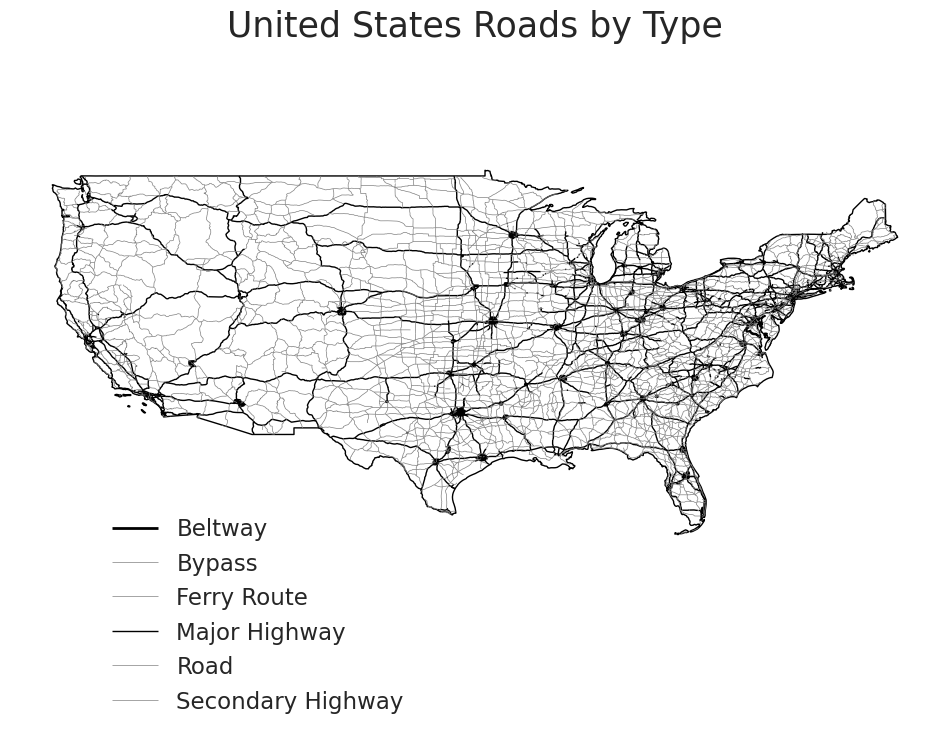

In [20]:
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', .5],
              'Road': ['grey', .5],
              'Bypass': ['grey', .5],
              'Ferry Route': ['grey', .5],
              'Major Highway': ['black', 1]}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax,
              linewidth=road_attrs[ctype][1])

country_boundary_us.plot(alpha=1, color="white", edgecolor="black", ax=ax)

ax.legend(frameon=False, 
          loc = (0.1, -0.1))

ax.set_title("United States Roads by Type", fontsize=25)
ax.set_axis_off()

plt.axis('equal')
plt.show()